In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [17]:
df = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

In [18]:
df.head()

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Jurisdiction of Occurrence                                                                72 non-null     object
 1   Year                                                                                      72 non-null     int64 
 2   Month                                                                                     72 non-null     int64 
 3   All Cause                                                                                 72 non-null     int64 
 4   Natural Cause                                                                             72 non-null     int64 
 5   Septicemia                                                        

In [20]:
df.describe()

,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2016.50000,6.500000,230428.361111,211008.333333,3338.847222,49772.930556,6836.638889,9515.652778,4561.12500,12963.944444,3379.388889,4190.763889,2713.222222,53407.347222,11941.194444,13249.666667,3225.333333,3819.611111,1534.833333,5157.291667
std,1.71981,3.476278,15602.341422,15118.931548,328.925466,1543.032804,611.213600,1267.264717,1692.39442,1666.018201,388.342181,344.254103,233.464068,4143.565866,911.097413,1255.711414,348.237089,294.549145,162.753075,793.379408
min,2014.00000,1.000000,204687.000000,187644.000000,2886.000000,45558.000000,5802.000000,6755.000000,2882.00000,10426.000000,2690.000000,3631.000000,2449.000000,46909.000000,9973.000000,10286.000000,2248.000000,3091.000000,1050.000000,3733.000000
25%,2015.00000,3.750000,219880.250000,199788.500000,3120.250000,48775.750000,6454.250000,8933.750000,3406.75000,11679.500000,3129.250000,3925.750000,2551.000000,50367.000000,11337.500000,12306.500000,3029.250000,3596.750000,1434.750000,4435.000000
50%,2016.50000,6.500000,227895.000000,208178.500000,3248.000000,49820.500000,6714.000000,9419.000000,3876.00000,12308.000000,3330.500000,4110.500000,2633.500000,52765.000000,11814.000000,13488.000000,3262.000000,3835.500000,1563.500000,5477.500000
75%,2018.00000,9.250000,237163.750000,216745.250000,3527.500000,50880.750000,7154.750000,10129.500000,5195.25000,14033.500000,3647.750000,4373.250000,2812.000000,54980.500000,12428.000000,14225.500000,3517.250000,4042.250000,1658.250000,5820.000000
max,2019.00000,12.000000,286744.000000,265418.000000,4502.000000,52876.000000,8674.000000,13410.000000,12164.00000,18271.000000,4603.000000,5346.000000,3465.000000,67024.000000,14653.000000,15292.000000,3834.000000,4378.000000,1804.000000,6299.000000


In [21]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [4,8]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

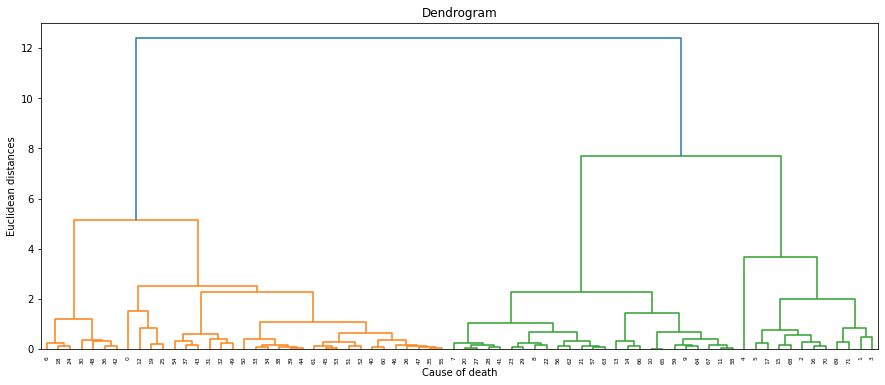

In [22]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cause of death')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(X)

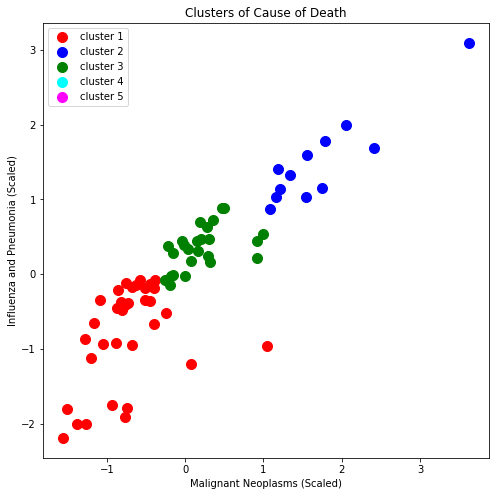

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s =100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s =100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1], s =100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3,1], s =100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4,1], s =100, c = 'magenta', label = 'cluster 5')
plt.title('Clusters of Cause of Death')
plt.xlabel('Malignant Neoplasms (Scaled)')
plt.ylabel('Influenza and Pneumonia (Scaled)')
plt.legend()
plt.show()